In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import itertools
import metodos_labo as labo 

plt.style.use('./informes.mplstyle')

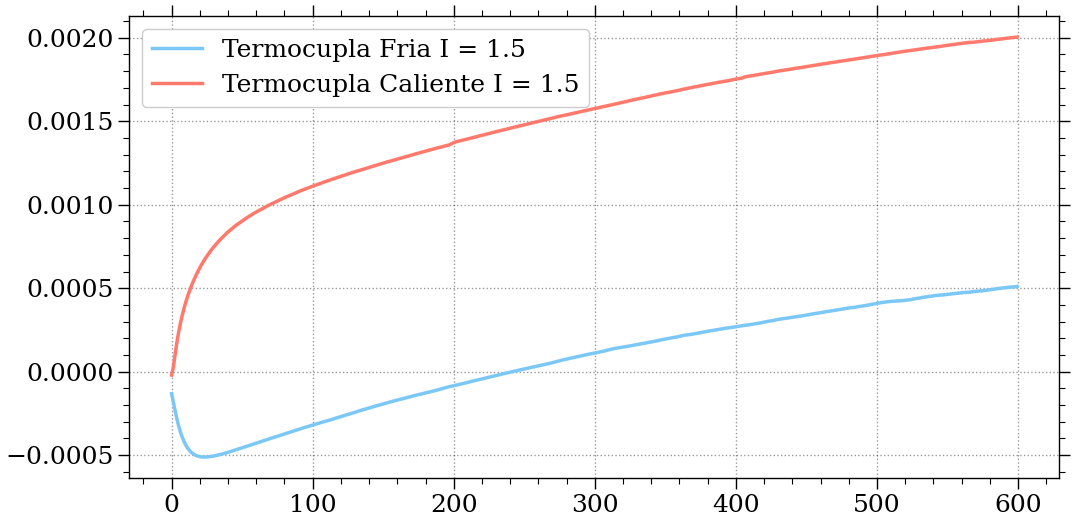

In [6]:
df = pd.read_csv(f'Mediciones/Clase 3/celda_tvsV_I=1.5.csv')
t       =   df['Tiempo [s]'].values
v       =   df['Tension generador [V]'].values
tf =   df['Tensión termocupla fria [V]'].values
tc =   df['Tensión termocupla caliente [V]'].values

fig, ax = plt.subplots()

ax.plot(t,tf,label = f'Termocupla Fria I = {1.5}', color = 'C1')
ax.plot(t,tc, label = f'Termocupla Caliente I = {1.5}', color = 'C3')
ax.legend() 

En 9 minutos 20 segundos, la difrencia de termperatura fue 6.324200000000025e-05 °C


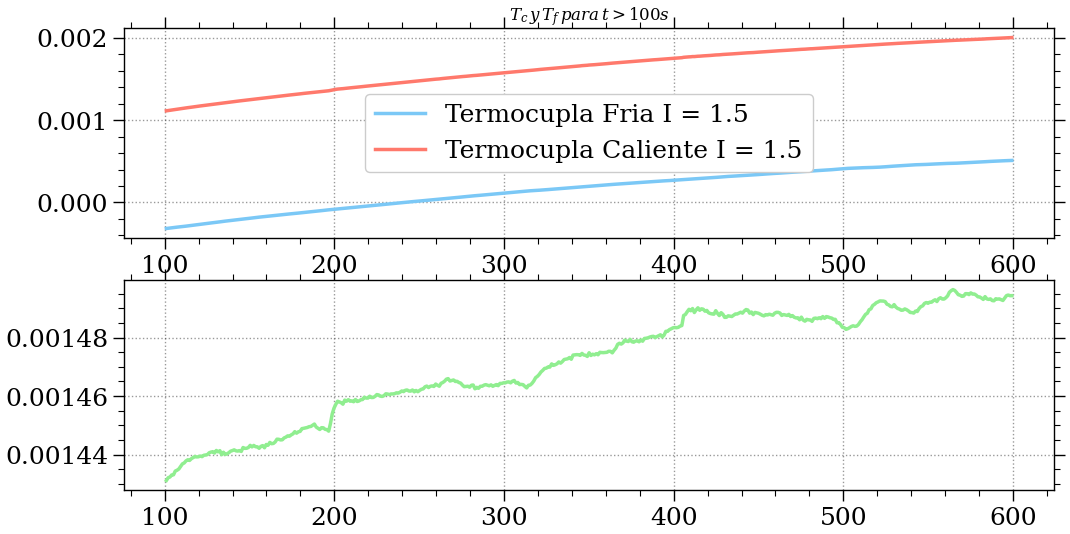

In [14]:
d2      =   df[df['Tiempo [s]']>100]
t       =   d2['Tiempo [s]'].values
v       =   d2['Tension generador [V]'].values
tf =   d2['Tensión termocupla fria [V]'].values
tc =   d2['Tensión termocupla caliente [V]'].values

fig, ax = plt.subplots(2,1)
ax[0].plot(t,tf,label = f'Termocupla Fria I = {1.5}', color = 'C1')
ax[0].plot(t,tc, label = f'Termocupla Caliente I = {1.5}', color = 'C3')
ax[0].legend() 
ax[0].set_title(f'$T_c \, y\, T_f \, para \, t>100s$')
ax[1].plot(t,tc-tf,label = f'$\Delta T$')
print(f'En 9 minutos 20 segundos, la difrencia de termperatura fue {(tc[-1]-tf[-1])-(tc[0]-tf[0])} °C')

Text(0, 0.5, 'Voltaje [mV]')

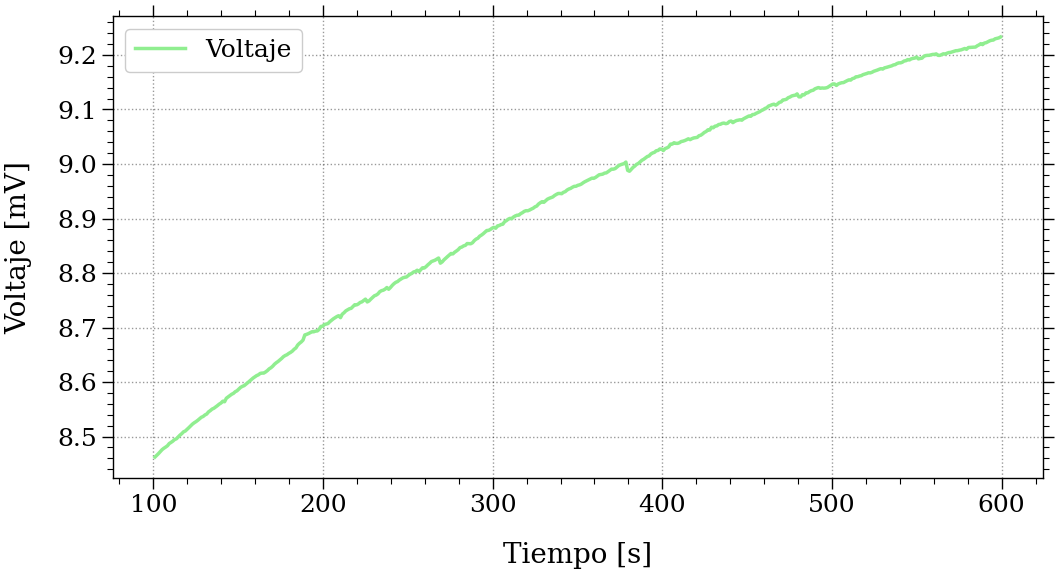

In [17]:
fig, ax = plt.subplots()

ax.plot(t,v,label = f'Voltaje')
ax.legend()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Voltaje [mV]')

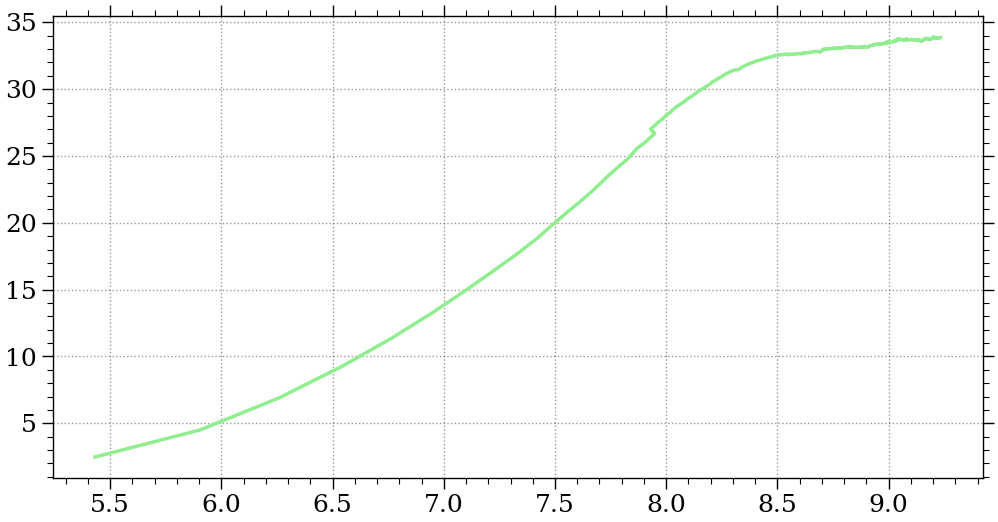

In [3]:
df = pd.read_csv(f'Mediciones/Clase 3/celda_tvsV_I=1.5.csv')
t       =   df['Tiempo [s]'].values
v       =   df['Tension generador [V]'].values
tf =   df['Tensión termocupla fria [V]'].values
tc =   df['Tensión termocupla caliente [V]'].values
delta_t = []

tf = tf*1e3 #Pasa el valor a mV
tc = tc*1e3
tf_temp = tf*22.619 + 28.0634 #Pasa el valor a temperatura [C]
tc_temp = tc*22.671 + 28.0135
delta_t = tc_temp - tf_temp

# falta:
# errores en delta t (propagación con los errores de las termocuplas)
# errores en v (los del multímetro)
# ajuste (con min cuad)
# ver de seleccionar una parte que parezca lineal + comparar con lo de fische

def lineal(x, m, b):
    return m*x + b


In [ ]:
# una vez que esté coef de seebeck:
# def cuenta_R(v, a, I, delta_t):
#     R = (v-a*delta_t)
#     return R